In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/purchase-data-for-task/transaction_data.csv
/kaggle/input/purchase-data-for-task/purchase_behaviour.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
purchase_behaviour = pd.read_csv("/kaggle/input/purchase-data-for-task/purchase_behaviour.csv")
transaction_data = pd.read_csv("/kaggle/input/purchase-data-for-task/transaction_data.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
purchase_behaviour.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [13]:
transaction_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [14]:
# Merge datasets on LYLTY_CARD_NBR to combine customer details with transactions
data = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Identify top 3 most profitable products
top_products = (
    data.groupby(["PROD_NBR", "PROD_NAME"])['TOT_SALES']
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)
print("Top 3 Most Profitable Products:")
print(top_products)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 3 Most Profitable Products:
    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [16]:
# Identify most loyal customers (most frequent buyers)
loyal_customers = (
    data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])
    .size()
    .reset_index(name="PURCHASE_COUNT")
    .sort_values(by="PURCHASE_COUNT", ascending=False)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Identify most frequent customer segment
most_loyal_segment = (
    loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .sum()["PURCHASE_COUNT"]
    .reset_index()
    .sort_values(by="PURCHASE_COUNT", ascending=False)
    .head(1)
)
print("\nMost Loyal Customer Segment:")
print(most_loyal_segment)


Most Loyal Customer Segment:
        LIFESTAGE PREMIUM_CUSTOMER  PURCHASE_COUNT
6  OLDER FAMILIES           Budget           23160


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Hypothesis: Why do these customers buy more?
most_loyal_lifestage = most_loyal_segment.iloc[0]['LIFESTAGE']
most_loyal_premium = most_loyal_segment.iloc[0]['PREMIUM_CUSTOMER']

hypothesis = (
    f"The most loyal customers are from the '{most_loyal_lifestage}' segment "
    f"and belong to the '{most_loyal_premium}' category. They likely prefer "
    "products that offer convenience, affordability, or premium quality based on their demographic."
)
print("\nHypothesis:")
print(hypothesis)


Hypothesis:
The most loyal customers are from the 'OLDER FAMILIES' segment and belong to the 'Budget' category. They likely prefer products that offer convenience, affordability, or premium quality based on their demographic.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Analyze characteristics of loyal customers
loyal_data = merged_data[merged_data["LYLTY_CARD_NBR"].isin(loyal_customers)]
loyal_characteristics = loyal_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="count")

print("\nLoyal Customer Characteristics:")
print(loyal_characteristics)



Loyal Customer Characteristics:
               LIFESTAGE PREMIUM_CUSTOMER  count
0         OLDER FAMILIES           Budget     46
1         OLDER FAMILIES       Mainstream     18
2         OLDER FAMILIES          Premium      2
3  OLDER SINGLES/COUPLES       Mainstream     15
4         YOUNG FAMILIES           Budget     44
5         YOUNG FAMILIES          Premium     16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


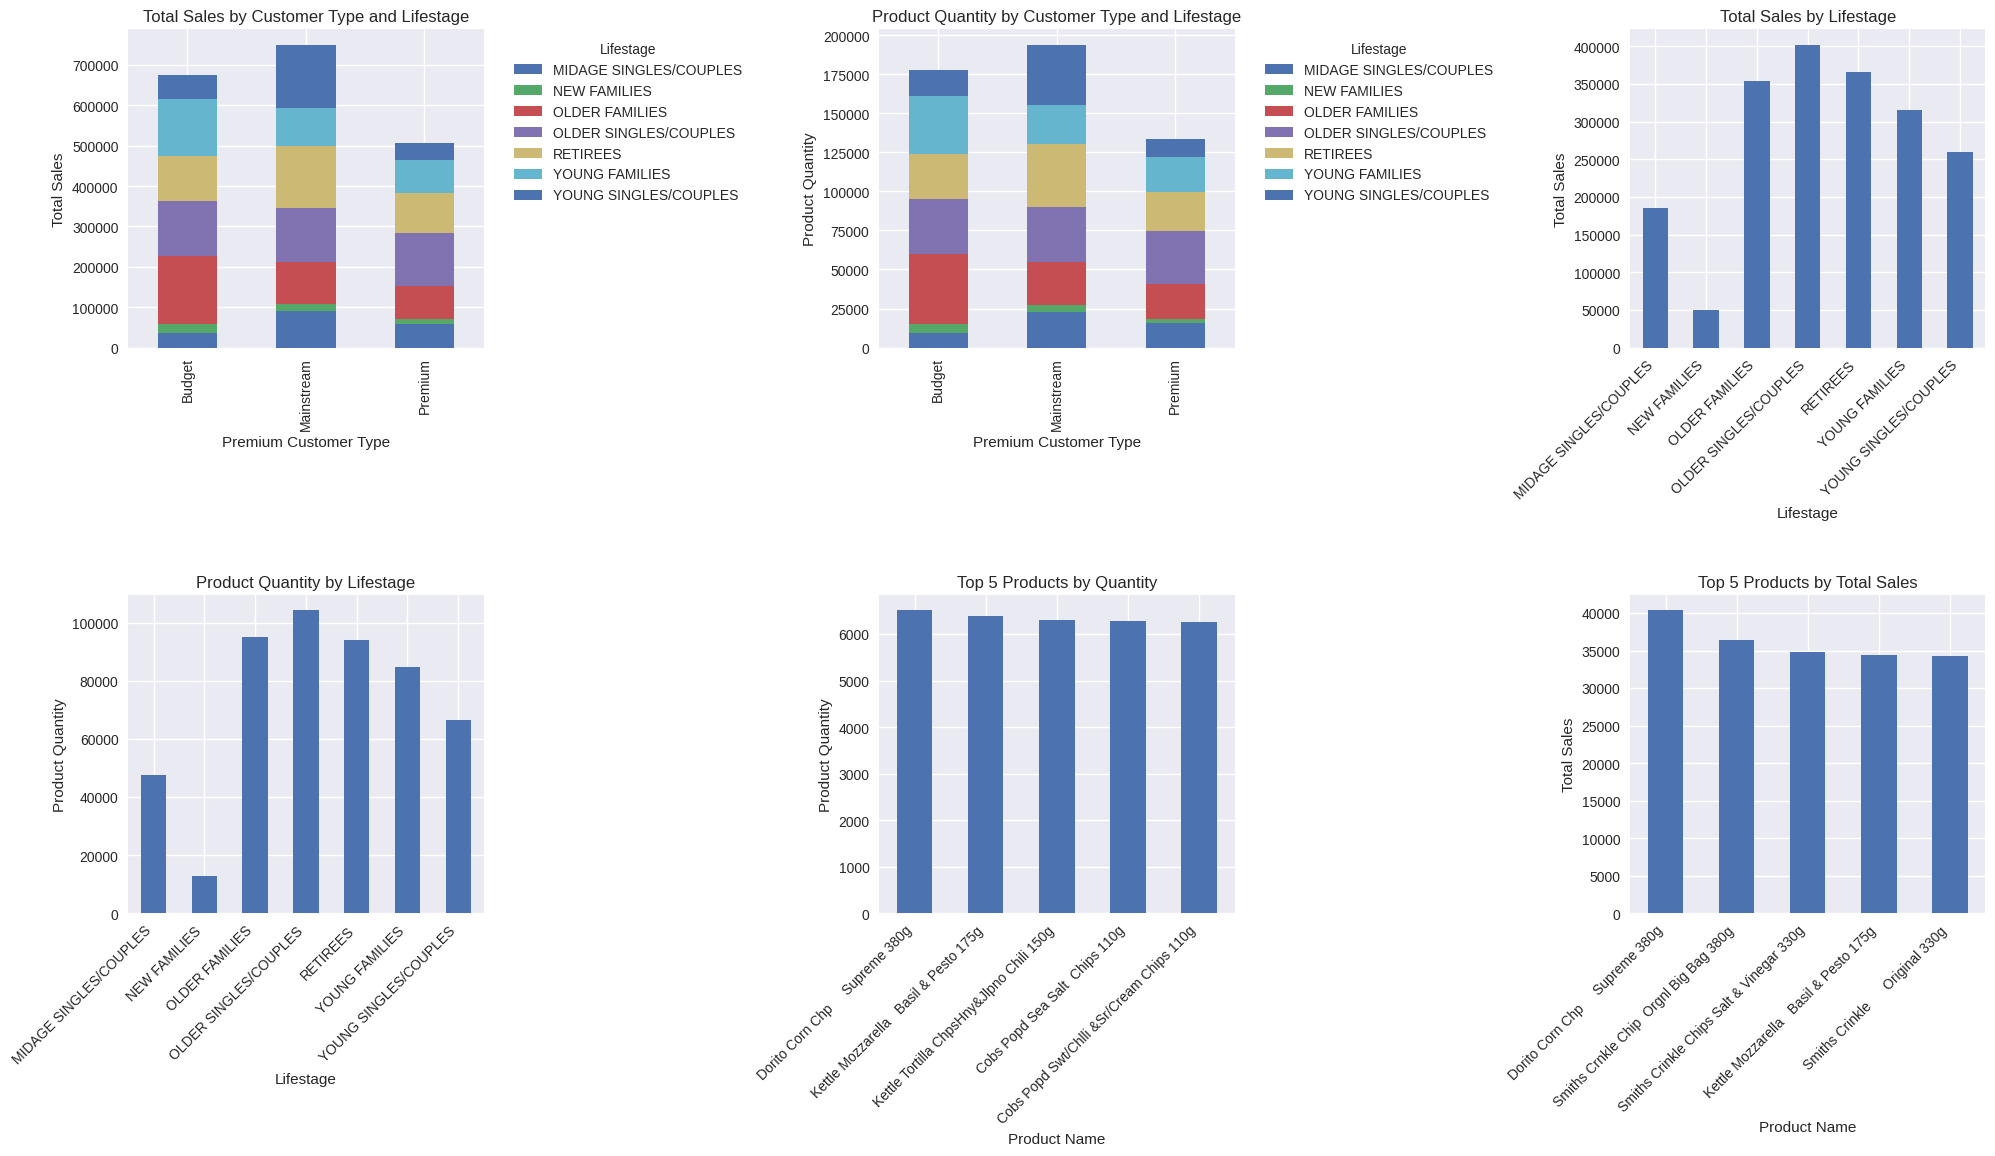

In [20]:
# Set up the visualization layout
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Stacked bar chart of TOT_SALES by PREMIUM_CUSTOMER and LIFESTAGE
plt.subplot(3, 3, 1)
sales_by_customer_lifestage = merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().unstack()
sales_by_customer_lifestage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Total Sales by Customer Type and Lifestage')
plt.xlabel('Premium Customer Type')
plt.ylabel('Total Sales')
plt.legend(title='Lifestage', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Stacked bar chart of PROD_QTY by PREMIUM_CUSTOMER and LIFESTAGE
plt.subplot(3, 3, 2)
qty_by_customer_lifestage = merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_QTY'].sum().unstack()
qty_by_customer_lifestage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Product Quantity by Customer Type and Lifestage')
plt.xlabel('Premium Customer Type')
plt.ylabel('Product Quantity')
plt.legend(title='Lifestage', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Bar chart of TOT_SALES by LIFESTAGE
plt.subplot(3, 3, 3)
sales_by_lifestage = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum()
sales_by_lifestage.plot(kind='bar', ax=plt.gca())
plt.title('Total Sales by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

# 4. Bar chart of PROD_QTY by LIFESTAGE
plt.subplot(3, 3, 4)
qty_by_lifestage = merged_data.groupby('LIFESTAGE')['PROD_QTY'].sum()
qty_by_lifestage.plot(kind='bar', ax=plt.gca())
plt.title('Product Quantity by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Product Quantity')
plt.xticks(rotation=45, ha='right')

# 5. Bar chart of PROD_QTY by PROD_NAME (Top 5)
plt.subplot(3, 3, 5)
qty_by_product = merged_data.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(5)
qty_by_product.plot(kind='bar', ax=plt.gca())
plt.title('Top 5 Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Product Quantity')
plt.xticks(rotation=45, ha='right')

# 6. Bar chart of Sum of TOT_SALES by PROD_NAME (Top 5)
plt.subplot(3, 3, 6)
sales_by_product = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(5)
sales_by_product.plot(kind='bar', ax=plt.gca())
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Task

Our (hypothetical) marketing department needs some help in focussing on the most important market segment. Instead of marketing to everyone, they need our help in identifying who our most profitable customers are. Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.
Also, they need help in identifying the bestselling products.
So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers. Also include your hypothesis of why you think the loyal customers like


### Most profitable customers overall – Older singles/couples
### Most profitable customers(budget) – Older families
### Most profitable customers(mainstream) – Young Singles/couples
### Most profitable customers(premium) – Older singles/couples

Overall greatest profit is generated by mainstream products so its advised that we focus on the young singles/couples.

Top 3 selling product – 

1. 	Dorito Corn Chip supreme 380g, most often bought by – older families
2.	Kettle Mozzarella Basil and Pesto 175g, most often bought by older singles/couples
3.	Kettle Tortilla Chips, honey and Jlpno chili 150g, most often bought by Older singles/couples


Top 3 most profitable products –

1.	Dorito Corn Chips Supreme 380g
2.	Smiths Crinkle Chip Original big bag 380g
3.	Smiths Crinkle Chips Salt and Vinegar 330g

Characteristics of the most loyal customers – 

Older Single/couples and old families – buy the most from the kettle company

budget members buy more products in total and also spend more money in total 
The category of people who make the company the most profit are the budget consumers, so its smartest to invest in making sure there’s more products and services given to the budget consumers. Plus most of the budget consumers are older families, such families tend to buy in bulk more often than other categories.
